In [1]:
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 (60k images, 10 classes)

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [2]:
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_train[100].shape

(32, 32, 3)

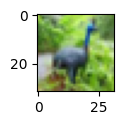

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize = (1,1))

plt.imshow(x_train[6])

plt.show()

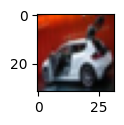

In [5]:
plt.figure(figsize = (1,1))

plt.imshow(x_test[6])

plt.show()

In [6]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [8]:
from keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [9]:
y_train_encoded.shape

(50000, 10)

In [10]:
from keras import models,layers

model = models.Sequential()

model.add(layers.Conv2D(filters = 32 , kernel_size= (3,3) , activation='relu',
                        padding = "same" , input_shape = (32,32,3)))
model.add(layers.Conv2D(filters = 32 , kernel_size= (3,3) , activation='relu',
                        padding = "same"))

model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters = 64 , kernel_size= (3,3) , activation='relu',
                        padding = "same"))
model.add(layers.Conv2D(filters = 64 , kernel_size= (3,3) , activation='relu',
                        padding = "same"))

model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters = 128 , kernel_size= (3,3) , activation='relu',
                        padding = "same"))
model.add(layers.Conv2D(filters = 128 , kernel_size= (3,3) , activation='relu',
                        padding = "same"))

model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters = 128 , kernel_size= (3,3) , activation='relu',
                        padding = "same"))
model.add(layers.Conv2D(filters = 128 , kernel_size= (3,3) , activation='relu',
                        padding = "same"))

model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters = 128 , kernel_size= (3,3) , activation='relu',
                        padding = "same"))
model.add(layers.Conv2D(filters = 128 , kernel_size= (3,3) , activation='relu',
                        padding = "same"))

model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(64 , activation='relu'))

model.add(layers.Dense(10 , activation = 'softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 2, 2, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 2, 2, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 886,250 (3.38 MB)

 Trainable params: 886,250 (3.38 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss = 'categorical_crossentropy' ,
              optimizer = 'adam',
              metrics = ['accuracy'])

In [13]:
model.fit(x_train , y_train_encoded,
          epochs=20,
          validation_data = (x_test, y_test_encoded))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 416s 261ms/step - accuracy: 0.2565 - loss: 1.9187 - val_accuracy: 0.4665 - val_loss: 1.4696
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 442s 262ms/step - accuracy: 0.5298 - loss: 1.2874 - val_accuracy: 0.5915 - val_loss: 1.1376
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 444s 263ms/step - accuracy: 0.6302 - loss: 1.0333 - val_accuracy: 0.6654 - val_loss: 0.9588
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 441s 262ms/step - accuracy: 0.6966 - loss: 0.8657 - val_accuracy: 0.6911 - val_loss: 0.8830
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 411s 263ms/step - accuracy: 0.7307 - loss: 0.7714 - val_accuracy: 0.7010 - val_loss: 0.8832
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 437s 260ms/step - accuracy: 0.7686 - loss: 0.6594 - val_accuracy: 0.7220 - val_loss: 0.8185
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 406s 260ms/step - accuracy: 0.7913 - loss: 0.5980 - val_accuracy: 0.7409 - val_loss: 0.7926
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 412s 263ms/step - ac

In [18]:
x_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [14]:
model.predict(x_test[100].reshape(1,32,32,3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


array([[5.9238583e-04, 5.8699385e-05, 1.4446467e-01, 6.1603893e-02,
        1.6746859e-01, 2.2738063e-01, 7.0714852e-04, 3.9680853e-01,
        6.5761073e-05, 8.4967102e-04]], dtype=float32)

In [15]:
model.predict(x_test[100].reshape(1,32,32,3)).sum()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


np.float32(1.0)

In [16]:
import numpy as np
print(np.argmax(model.predict(x_test[100].reshape(1,32,32,3))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
7


In [17]:
y_test[100]

array([4], dtype=uint8)